In [1]:
import pandas as pd
!pip install pycaret
from pycaret.clustering import *

In [2]:
from google.colab import files
import io
uploaded = files.upload()
data_file = pd.read_csv(io.BytesIO(uploaded["SDSS_DR18.csv"]))
data_file.head()

Saving SDSS_DR18.csv to SDSS_DR18.csv


objid     specobjid          ra       dec         u         g  \
0  1.240000e+18  3.240000e+17  184.950869  0.733068  18.87062  17.59612   
1  1.240000e+18  3.250000e+17  185.729201  0.679704  19.59560  19.92153   
2  1.240000e+18  3.240000e+17  185.687690  0.823480  19.26421  17.87891   
3  1.240000e+18  2.880000e+18  185.677904  0.768362  19.49739  17.96166   
4  1.240000e+18  2.880000e+18  185.814763  0.776940  18.31519  16.83033   

          r         i         z  run  ...  psfMag_g  psfMag_i  psfMag_z  \
0  17.11245  16.83899  16.70908  756  ...  19.96352  19.25145  19.05230   
1  20.34448  20.66213  20.59599  756  ...  19.92417  20.65535  20.57387   
2  17.09593  16.65159  16.35329  756  ...  19.33645  18.16669  17.78844   
3  17.41269  17.20545  17.11567  756  ...  17.96176  17.21564  17.12367   
4  16.26352  16.06320  15.97527  756  ...  16.85104  16.08275  15.98694   

    expAB_u   expAB_g   expAB_r   expAB_i   expAB_z  redshift   class  
0  0.479021  0.518483  0.520474  0.508502  0.488969  0.041691  GALAXY  
1  0.573926  0.531728  0.403072  0.999874  0.189495 -0.000814    STAR  
2  0.701666  0.743386  0.770897  0.778642  0.736771  0.113069  GALAXY  
3  0.999818  0.787760  0.745611  0.399718  0.986137  0.000087    STAR  
4  0.999795  0.834450  0.723526  0.712259  0.527055  0.000018    STAR  

[5 rows x 43 columns]

In [3]:
new_data = data_file.copy().drop('class', axis = 1)
new_data.head(5)

objid     specobjid          ra       dec         u         g  \
0  1.240000e+18  3.240000e+17  184.950869  0.733068  18.87062  17.59612   
1  1.240000e+18  3.250000e+17  185.729201  0.679704  19.59560  19.92153   
2  1.240000e+18  3.240000e+17  185.687690  0.823480  19.26421  17.87891   
3  1.240000e+18  2.880000e+18  185.677904  0.768362  19.49739  17.96166   
4  1.240000e+18  2.880000e+18  185.814763  0.776940  18.31519  16.83033   

          r         i         z  run  ...  psfMag_r  psfMag_g  psfMag_i  \
0  17.11245  16.83899  16.70908  756  ...  19.50324  19.96352  19.25145   
1  20.34448  20.66213  20.59599  756  ...  20.34491  19.92417  20.65535   
2  17.09593  16.65159  16.35329  756  ...  18.54832  19.33645  18.16669   
3  17.41269  17.20545  17.11567  756  ...  17.42272  17.96176  17.21564   
4  16.26352  16.06320  15.97527  756  ...  16.28580  16.85104  16.08275   

   psfMag_z   expAB_u   expAB_g   expAB_r   expAB_i   expAB_z  redshift  
0  19.05230  0.479021  0.518483  0.520474  0.508502  0.488969  0.041691  
1  20.57387  0.573926  0.531728  0.403072  0.999874  0.189495 -0.000814  
2  17.78844  0.701666  0.743386  0.770897  0.778642  0.736771  0.113069  
3  17.12367  0.999818  0.787760  0.745611  0.399718  0.986137  0.000087  
4  15.98694  0.999795  0.834450  0.723526  0.712259  0.527055  0.000018  

[5 rows x 42 columns]

In [4]:
clustering_setup = setup(new_data, session_id=123)

In [5]:
kmeans = create_model('kmeans')


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
models()

Name  \
ID                                            
kmeans                   K-Means Clustering   
ap                     Affinity Propagation   
meanshift             Mean Shift Clustering   
sc                      Spectral Clustering   
hclust             Agglomerative Clustering   
dbscan     Density-Based Spatial Clustering   
optics                    OPTICS Clustering   
birch                      Birch Clustering   

                                                   Reference  
ID                                                            
kmeans                        sklearn.cluster._kmeans.KMeans  
ap         sklearn.cluster._affinity_propagation.Affinity...  
meanshift              sklearn.cluster._mean_shift.MeanShift  
sc              sklearn.cluster._spectral.SpectralClustering  
hclust     sklearn.cluster._agglomerative.AgglomerativeCl...  
dbscan                        sklearn.cluster._dbscan.DBSCAN  
optics                        sklearn.cluster._optics.OPTICS  
birch                           sklearn.cluster._birch.Birch

In [7]:
plot_model(kmeans, plot = 'cluster')

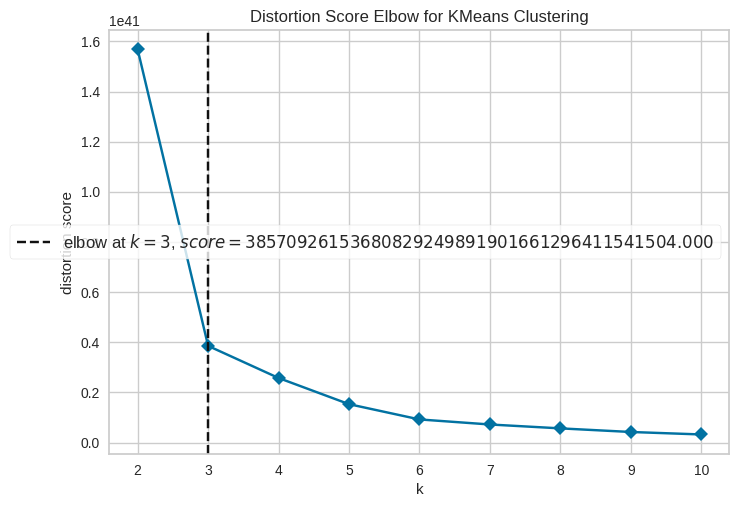

In [8]:
plot_model(kmeans, plot = 'elbow')

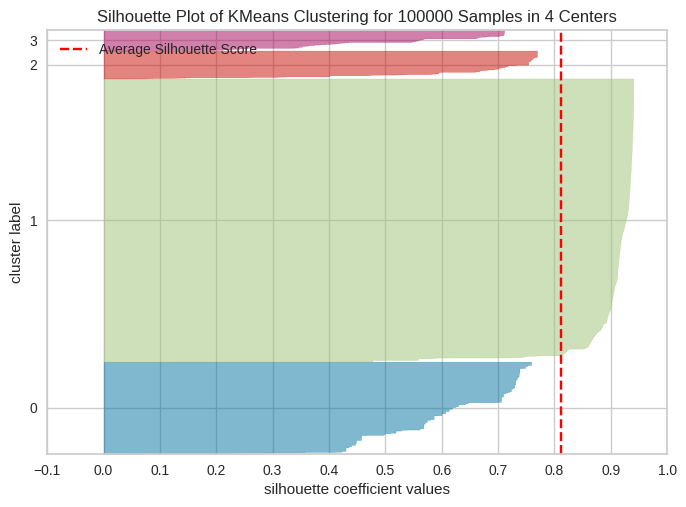

In [9]:
plot_model(kmeans, plot = 'silhouette')

In [10]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
kmeans_pred = predict_model(kmeans, data=data_file)
kmeans_pred

objid     specobjid          ra        dec         u         g  \
0      1.240000e+18  3.240000e+17  184.950869   0.733068  18.87062  17.59612   
1      1.240000e+18  3.250000e+17  185.729201   0.679704  19.59560  19.92153   
2      1.240000e+18  3.240000e+17  185.687690   0.823480  19.26421  17.87891   
3      1.240000e+18  2.880000e+18  185.677904   0.768362  19.49739  17.96166   
4      1.240000e+18  2.880000e+18  185.814763   0.776940  18.31519  16.83033   
...             ...           ...         ...        ...       ...       ...   
99995  1.240000e+18  3.580000e+18  154.077143  55.614066  19.39861  18.35476   
99996  1.240000e+18  3.580000e+18  154.067926  55.635794  19.07703  18.05159   
99997  1.240000e+18  1.070000e+18  153.897018  55.712582  19.07982  17.51349   
99998  1.240000e+18  6.950000e+17  235.656141  56.297044  17.27528  16.41704   
99999  1.240000e+18  6.950000e+17  235.821749  56.400331  17.90598  16.86471   

              r         i         z     run  ...  psfMag_g  psfMag_i  \
0      17.11245  16.83899  16.70908   756.0  ...  19.96352  19.25145   
1      20.34448  20.66213  20.59599   756.0  ...  19.92417  20.65535   
2      17.09593  16.65159  16.35329   756.0  ...  19.33645  18.16669   
3      17.41269  17.20545  17.11567   756.0  ...  17.96176  17.21564   
4      16.26352  16.06320  15.97527   756.0  ...  16.85104  16.08275   
...         ...       ...       ...     ...  ...       ...       ...   
99995  18.00348  17.89408  17.81222  2243.0  ...  18.35865  17.90406   
99996  17.78332  17.68976  17.66209  2243.0  ...  18.06198  17.69745   
99997  16.64037  16.24183  15.91180  2243.0  ...  19.05242  17.79391   
99998  16.11662  15.98858  15.97745  2206.0  ...  16.42854  15.98151   
99999  16.51673  16.35695  16.22508  2206.0  ...  19.24882  18.77434   

       psfMag_z   expAB_u   expAB_g   expAB_r   expAB_i   expAB_z  redshift  \
0      19.05230  0.479021  0.518483  0.520474  0.508502  0.488969  0.041691   
1      20.57387  0.573926  0.531728  0.403072  0.999874  0.189495 -0.000814   
2      17.78844  0.701666  0.743386  0.770897  0.778642  0.736771  0.113069   
3      17.12367  0.999818  0.787760  0.745611  0.399718  0.986137  0.000087   
4      15.98694  0.999795  0.834450  0.723526  0.712259  0.527055  0.000018   
...         ...       ...       ...       ...       ...       ...       ...   
99995  17.82489  0.999653  0.999791  0.794516  0.802310  0.537987 -0.000101   
99996  17.67005  0.802407  0.999912  0.999776  0.999682  0.544329 -0.000352   
99997  17.40130  0.859021  0.760212  0.769053  0.772322  0.845797  0.117501   
99998  15.97900  0.655041  0.199795  0.481020  0.650008  0.822835 -0.000400   
99999  18.66533  0.396915  0.415040  0.437322  0.437766  0.446210  0.014457   

         Cluster  
0      Cluster 1  
1      Cluster 1  
2      Cluster 1  
3      Cluster 0  
4      Cluster 0  
...          ...  
99995  Cluster 0  
99996  Cluster 0  
99997  Cluster 1  
99998  Cluster 1  
99999  Cluster 1  

[100000 rows x 43 columns]

In [12]:
kmeans = create_model('kmeans', num_clusters=3)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [16]:
save_model(kmeans, 'best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['objid', 'specobjid', 'ra', 'dec',
                                              'u', 'g', 'r', 'i', 'z', 'run',
                                              'rerun', 'camcol', 'field',
                                              'plate', 'mjd', 'fiberid',
                                              'petroRad_u', 'petroRad_g',
                                              'petroRad_i', 'petroRad_r',
                                              'petroRad_z', 'petroFlux_u',
                                              'petroFlux_g', 'petroFlux_i',
                                              'petroFlux_r', 'petroFlux_z',
                                              'petroR50_u', 'petroR50_g',
                                              'petroR50_i', 'petroR50_r', ...],
                                     transformer=SimpleImputer())),
                 (